# Crop Price Prediction

### Data preprocessing

In [1]:
import pandas as pd
import numpy as np

excel_data = pd.read_excel('./Dataset/Modal price included.xlsx')
dataframe = pd.DataFrame(excel_data)

In [2]:
dataframe.head()

,Market,Date,Variety,Grade,Arrivals,Unit,Min,Max,Modal,District
0,BANTWALA,2022-04-01 00:00:00,COCA,AVERAGE,20.0,Quintal,12500.0,25000.0,22500.0,Dakshina Kannada
1,NaN,2022-04-04 00:00:00,COCA,AVERAGE,12.0,Quintal,12500.0,25000.0,22500.0,Dakshina Kannada
2,NaN,2022-04-05 00:00:00,COCA,AVERAGE,17.0,Quintal,12500.0,25000.0,22500.0,Dakshina Kannada
3,NaN,2022-04-06 00:00:00,COCA,AVERAGE,28.0,Quintal,12500.0,25000.0,22500.0,Dakshina Kannada
4,NaN,2022-04-07 00:00:00,COCA,AVERAGE,13.0,Quintal,12500.0,25000.0,22500.0,Dakshina Kannada


In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8889 entries, 0 to 8888
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Market    876 non-null    object 
 1   Date      8451 non-null   object 
 2   Variety   8451 non-null   object 
 3   Grade     8451 non-null   object 
 4   Arrivals  8451 non-null   float64
 5   Unit      8451 non-null   object 
 6   Min       8451 non-null   float64
 7   Max       8451 non-null   float64
 8   Modal     8451 non-null   float64
 9   District  8451 non-null   object 
dtypes: float64(4), object(6)
memory usage: 694.6+ KB


In [4]:
dataframe.isna().sum()

Market      8013
Date         438
Variety      438
Grade        438
Arrivals     438
Unit         438
Min          438
Max          438
Modal        438
District     438
dtype: int64

#### Market coulumn has many NaN vlaues in between, First we fill it by considering the first value in each row

In [5]:
dataframe['Market'] = dataframe['Market'].fillna(method= 'pad')
print('After filling the null values')
dataframe.isna().sum()

After filling the null values


Market        0
Date        438
Variety     438
Grade       438
Arrivals    438
Unit        438
Min         438
Max         438
Modal       438
District    438
dtype: int64

In [6]:
dataframe.tail()

,Market,Date,Variety,Grade,Arrivals,Unit,Min,Max,Modal,District
8884,SULYA,2022-09-12 00:00:00,BLACK PEPPER,AVERAGE,11.0,Quintal,30000.0,49500.0,46300.0,Dakshina Kannada
8885,SULYA,2022-09-19 00:00:00,BLACK PEPPER,AVERAGE,16.0,Quintal,30000.0,49000.0,40000.0,Dakshina Kannada
8886,SULYA,2022-09-28 00:00:00,BLACK PEPPER,AVERAGE,30.0,Quintal,30000.0,49500.0,48700.0,Dakshina Kannada
8887,SULYA,2022-09-30 00:00:00,BLACK PEPPER,AVERAGE,12.0,Quintal,30000.0,49000.0,40000.0,Dakshina Kannada
8888,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### There are some empty rows inbetween we remove it by considering one of the columns NaN value

In [7]:
print('Before removing Null values: ')
dataframe.isna().sum()

Before removing Null values: 


Market        0
Date        438
Variety     438
Grade       438
Arrivals    438
Unit        438
Min         438
Max         438
Modal       438
District    438
dtype: int64

In [8]:
dataframe = dataframe.dropna(subset=['Unit'])

In [9]:
print('After removing Null values: ')
dataframe.isna().sum()

After removing Null values: 


Market      0
Date        0
Variety     0
Grade       0
Arrivals    0
Unit        0
Min         0
Max         0
Modal       0
District    0
dtype: int64

#### Additional information

In [10]:
dataframe.describe()

,Arrivals,Min,Max,Modal
count,8451.000000,8451.000000,8451.000000,8451.000000
mean,3083.807242,22540.610342,33188.377588,28955.751035
std,21716.029849,10651.062144,11636.051360,10915.411474
min,1.000000,800.000000,1600.000000,1400.000000
25%,16.000000,12500.000000,25000.000000,20000.000000
50%,56.000000,22500.000000,31800.000000,27500.000000
75%,245.000000,28500.000000,43000.000000,37000.000000
max,755975.000000,51250.000000,58000.000000,53000.000000


In [11]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8451 entries, 0 to 8887
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Market    8451 non-null   object 
 1   Date      8451 non-null   object 
 2   Variety   8451 non-null   object 
 3   Grade     8451 non-null   object 
 4   Arrivals  8451 non-null   float64
 5   Unit      8451 non-null   object 
 6   Min       8451 non-null   float64
 7   Max       8451 non-null   float64
 8   Modal     8451 non-null   float64
 9   District  8451 non-null   object 
dtypes: float64(4), object(6)
memory usage: 726.3+ KB


#### Converting the Date from object type to datetime type

In [12]:
df = dataframe
df['Date'] = pd.to_datetime(df['Date'])
print(df['Date'].dtype)

datetime64[ns]


#### Sorting the date

In [13]:
df.sort_values(by='Date',inplace=True)
df.head()

,Market,Date,Variety,Grade,Arrivals,Unit,Min,Max,Modal,District
6296,PUTTUR,2020-01-01,NEW VARIETY,AVERAGE,310.0,Quintal,15000.0,24500.0,19750.0,Dakshina Kannada
4730,MANGALURU,2020-01-01,NEW VARIETY,AVERAGE,85.0,Quintal,20000.0,24500.0,22000.0,Dakshina Kannada
3007,BELTHANGADI,2020-01-01,OTHER,AVERAGE,3.0,Quintal,21000.0,22000.0,21500.0,Dakshina Kannada
4754,MANGALURU,2020-01-01,OLD VARIETY,AVERAGE,95.0,Quintal,25000.0,29500.0,28000.0,Dakshina Kannada
4706,MANGALURU,2020-01-01,COCA,AVERAGE,100.0,Quintal,16000.0,21500.0,19000.0,Dakshina Kannada


In [14]:
df.reset_index(drop=True)

,Market,Date,Variety,Grade,Arrivals,Unit,Min,Max,Modal,District
0,PUTTUR,2020-01-01,NEW VARIETY,AVERAGE,310.0,Quintal,15000.0,24500.0,19750.0,Dakshina Kannada
1,MANGALURU,2020-01-01,NEW VARIETY,AVERAGE,85.0,Quintal,20000.0,24500.0,22000.0,Dakshina Kannada
2,BELTHANGADI,2020-01-01,OTHER,AVERAGE,3.0,Quintal,21000.0,22000.0,21500.0,Dakshina Kannada
3,MANGALURU,2020-01-01,OLD VARIETY,AVERAGE,95.0,Quintal,25000.0,29500.0,28000.0,Dakshina Kannada
4,MANGALURU,2020-01-01,COCA,AVERAGE,100.0,Quintal,16000.0,21500.0,19000.0,Dakshina Kannada
...,...,...,...,...,...,...,...,...,...,...
8446,BANTWALA,2022-12-31,COCA,AVERAGE,39.0,Quintal,12500.0,25000.0,22500.0,Dakshina Kannada
8447,BANTWALA,2022-12-31,NEW VARIETY,AVERAGE,4.0,Quintal,22500.0,38000.0,37500.0,Dakshina Kannada
8448,BELTHANGADI,2022-12-31,COCA,AVERAGE,50.0,Quintal,23000.0,24000.0,23500.0,Dakshina Kannada
8449,BELTHANGADI,2022-12-31,OLD VARIETY,AVERAGE,317.0,Quintal,43600.0,48000.0,46000.0,Dakshina Kannada


In [15]:
df['Variety'].unique()

array(['NEW VARIETY', 'OTHER', 'OLD VARIETY', 'COCA', 'GRADE- II',
       'GRADE-I', 'BLACK PEPPER', 'MEDIUM', 'COCONUT'], dtype=object)

### Exploratory Data Analysis
#### Visualize the data

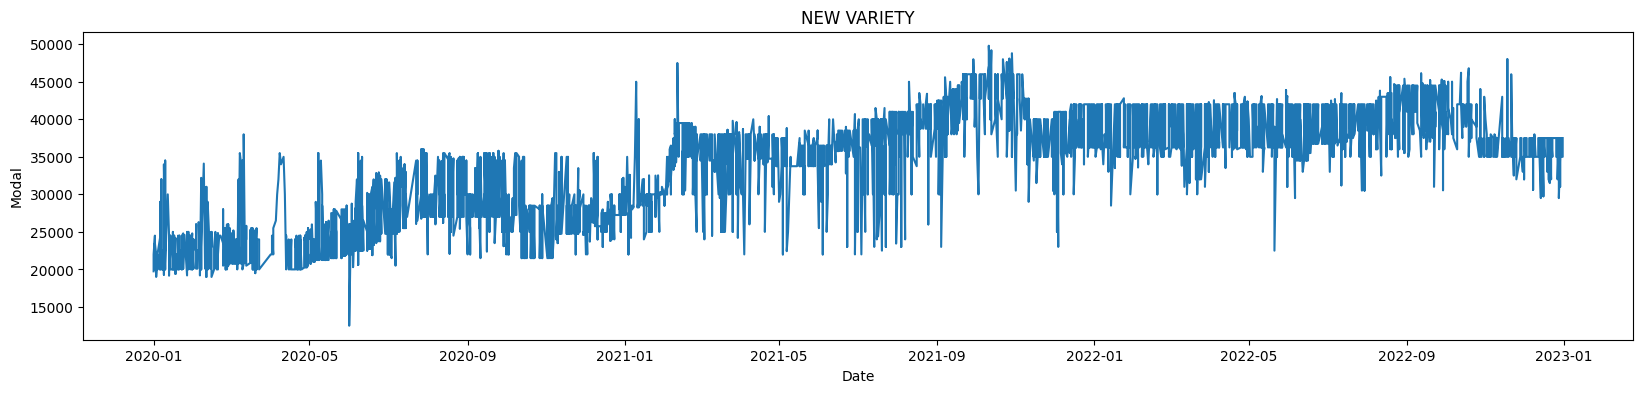

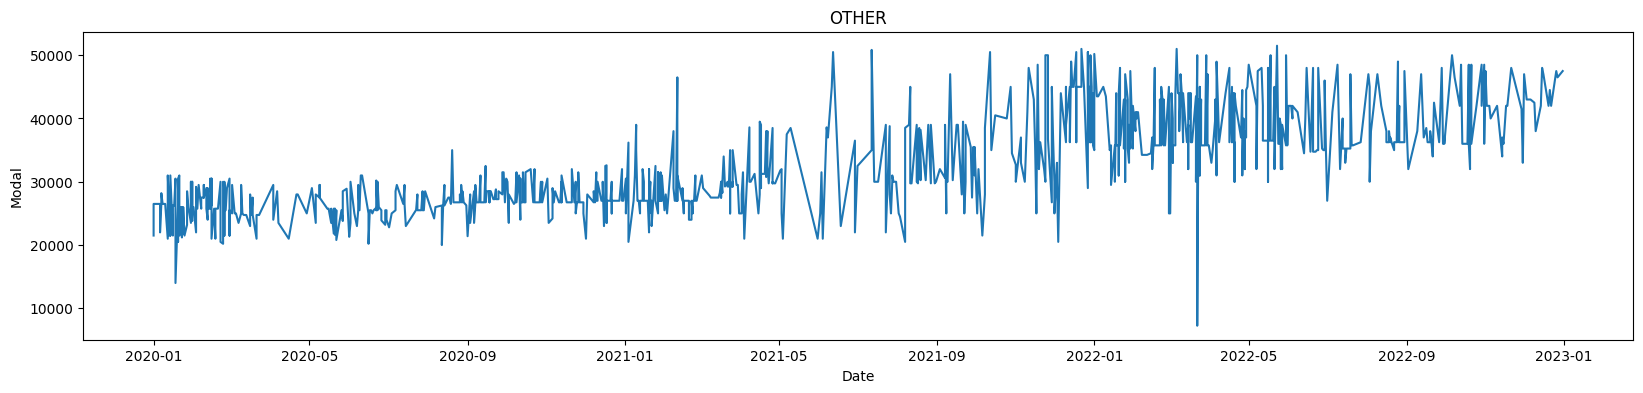

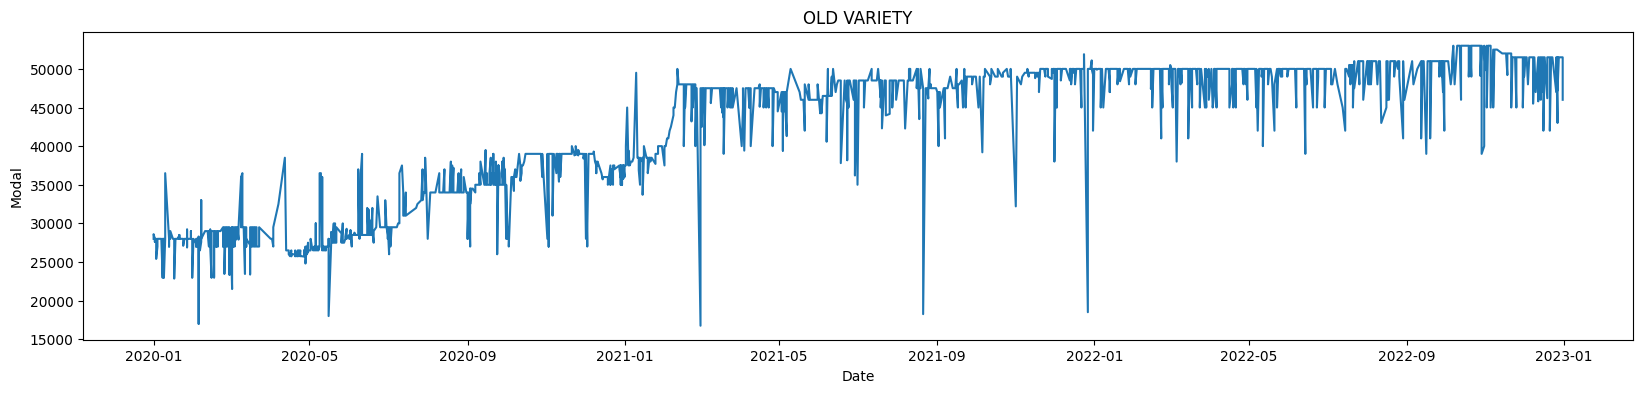

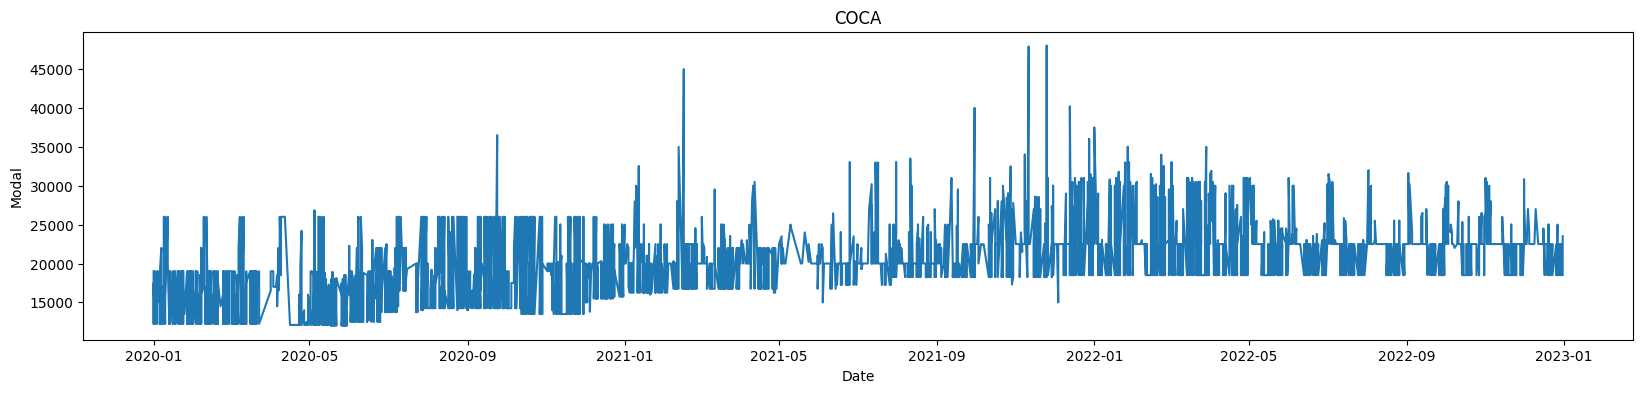

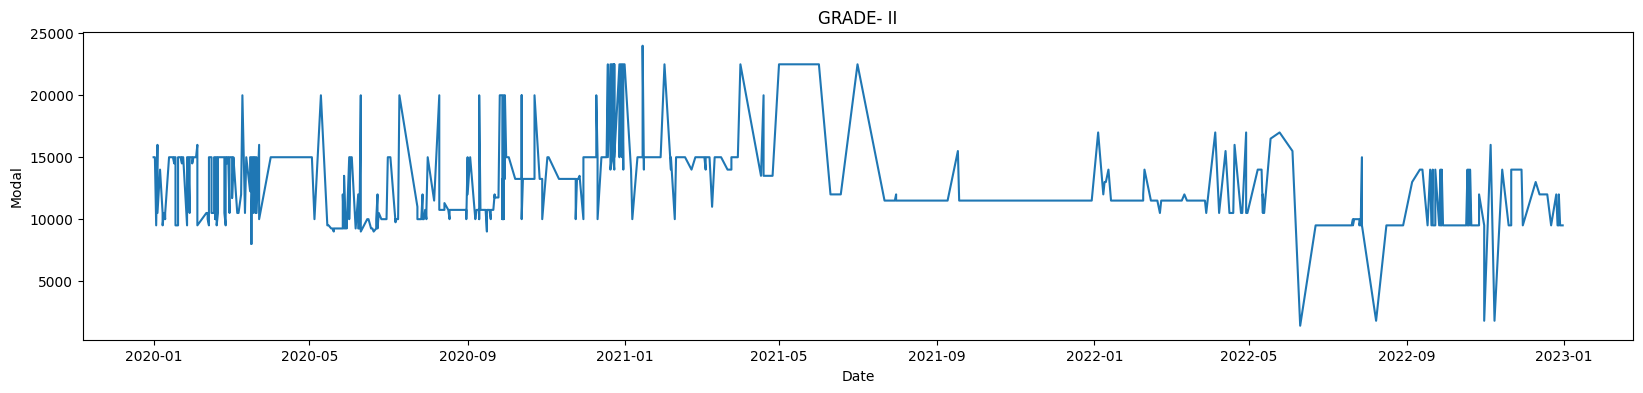

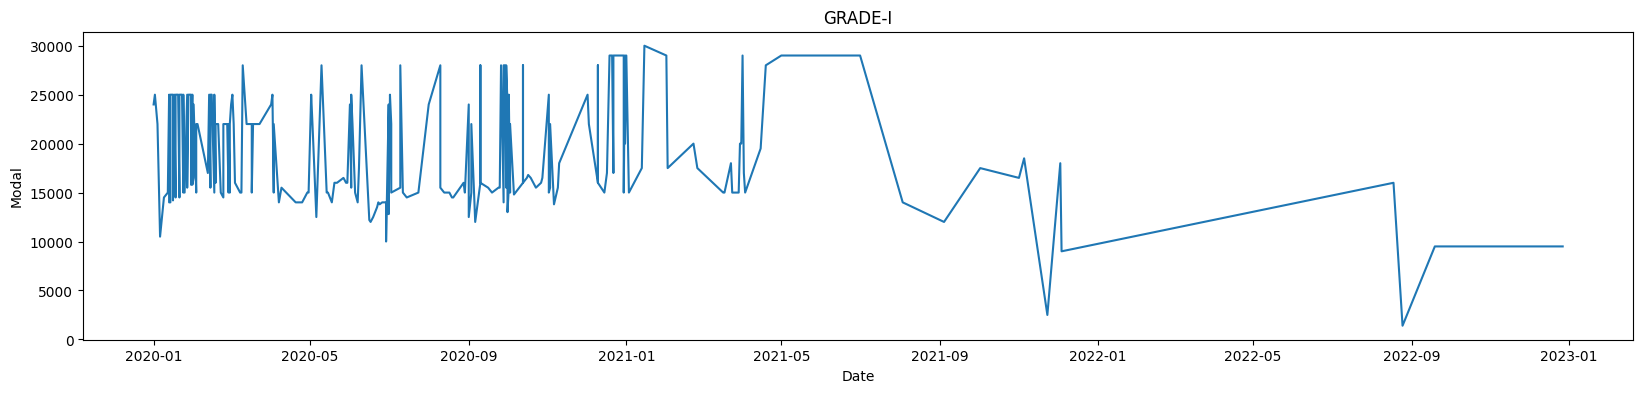

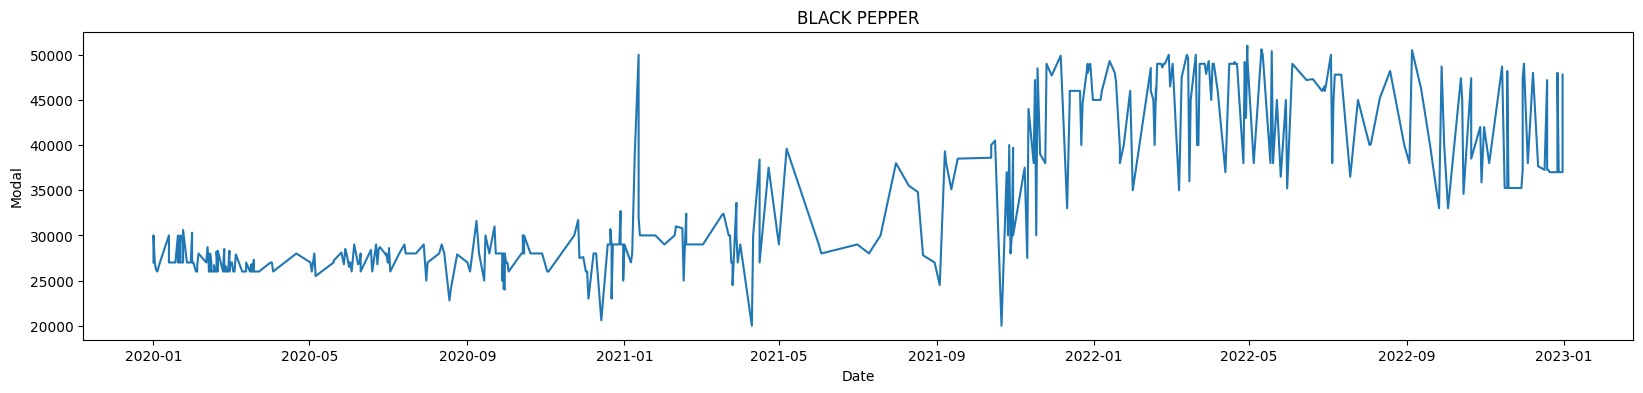

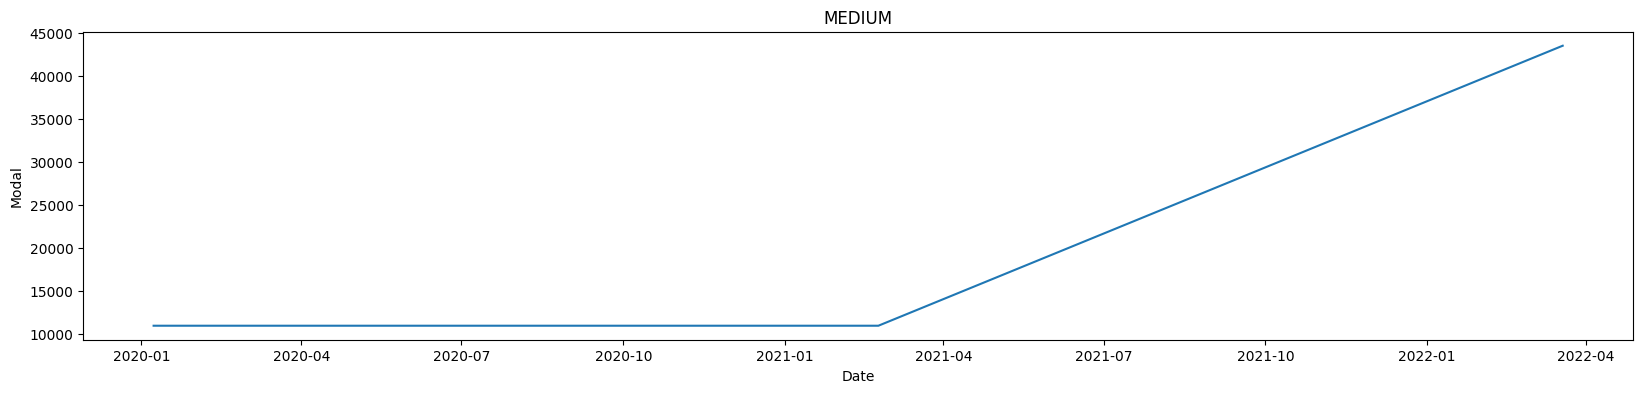

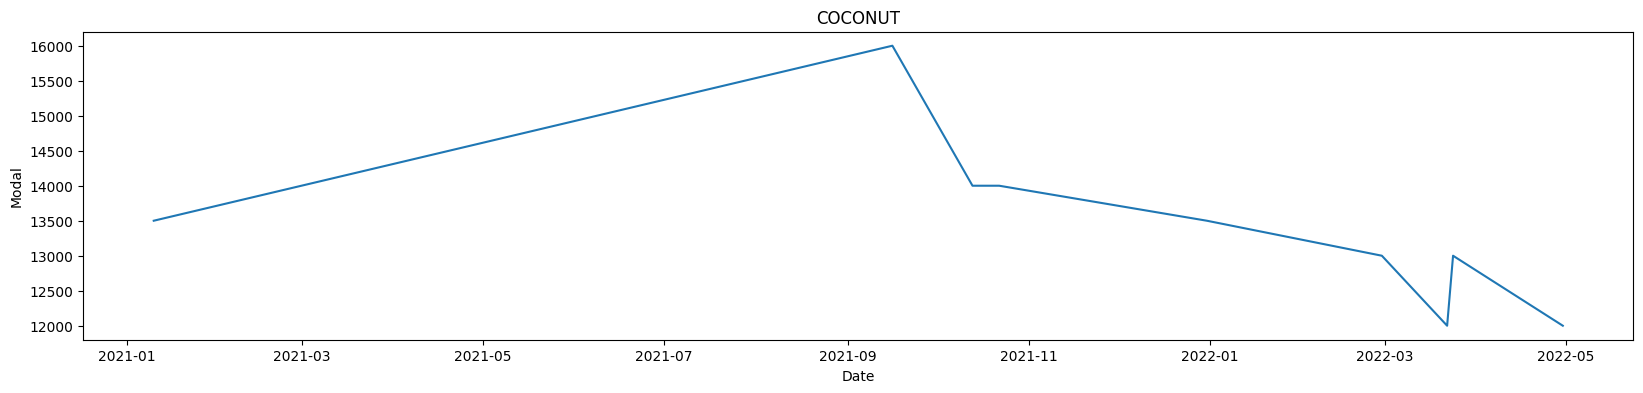

In [16]:
from matplotlib import pyplot as plt

varieties = list(df['Variety'].unique())
df2 = df
for variety in varieties:
    subset = df2[df2['Variety'] == variety]
    plt.figure(figsize=(20,4))
    plt.plot(subset['Date'],subset['Modal'])
    plt.title(variety)
    plt.xlabel('Date')
    plt.ylabel('Modal')
    plt.show()


### Augmented Dickey-Fuller Test (ADF Test) to check stationarity
#### The function to check adf test is as follows

    def adfuller_test(Modal):
        result = adfuller(Modal)
        labels = ['ADF test statistic', 'p-value', 'Lags used', 'No. of observations used']
        for values, label in zip(result, lables):
            print(label+' : '+str(value))
        if result[1] <= 0.05:
            print("The time series is likely stationary.")
        else:
            print("The time series is likely non-stationary.")

In [17]:
ignore_variety = ['MEDIUM','COCONUT']

from statsmodels.tsa.stattools import adfuller

labels = ['ADF test statistic', 'p-value', 'Lags used', 'No. of observations used']
non_stationary = {}
for variety in varieties:
    if variety not in ignore_variety:
        subset = df2[df2['Variety'] == variety]
        time_series = subset['Modal']
        result = adfuller(time_series)

        print(f'For variety: {variety}')
        for value, label in zip(result, labels):
            #print(f'p_value for variety {variety} is {p_value}')
            print(label+' : '+str(value))
        if result[1]<= 0.05:
            print("The time series is likely stationary.")
        else:
            non_stationary[variety] = result[1]
            print("The time series is likely non-stationary.")
        print('------------------------------------------------------------')

For variety: NEW VARIETY
ADF test statistic : -2.002347176236761
p-value : 0.28554489346777956
Lags used : 23
No. of observations used : 2648
The time series is likely non-stationary.
------------------------------------------------------------
For variety: OTHER
ADF test statistic : -0.8940091205367166
p-value : 0.7899388974543333
Lags used : 18
No. of observations used : 868
The time series is likely non-stationary.
------------------------------------------------------------
For variety: OLD VARIETY
ADF test statistic : -1.2432639386541953
p-value : 0.6547134342403562
Lags used : 23
No. of observations used : 1300
The time series is likely non-stationary.
------------------------------------------------------------
For variety: COCA
ADF test statistic : -3.3146013893032937
p-value : 0.014238275229952826
Lags used : 25
No. of observations used : 2322
The time series is likely stationary.
------------------------------------------------------------
For variety: GRADE- II
ADF test stat

In [18]:
non_stationary_varieties = list(non_stationary.keys())
print(non_stationary_varieties)

['NEW VARIETY', 'OTHER', 'OLD VARIETY', 'BLACK PEPPER']


#### First difference for each variety to make it stationary

In [19]:
df_newvariety = df2[df2['Variety'] == 'NEW VARIETY']
df_newvariety

,Market,Date,Variety,Grade,Arrivals,Unit,Min,Max,Modal,District
6296,PUTTUR,2020-01-01,NEW VARIETY,AVERAGE,310.0,Quintal,15000.0,24500.0,19750.0,Dakshina Kannada
4730,MANGALURU,2020-01-01,NEW VARIETY,AVERAGE,85.0,Quintal,20000.0,24500.0,22000.0,Dakshina Kannada
1296,BANTWALA,2020-01-01,NEW VARIETY,AVERAGE,80.0,Quintal,18000.0,24500.0,22000.0,Dakshina Kannada
2824,BELTHANGADI,2020-01-02,NEW VARIETY,AVERAGE,312.0,Quintal,24000.0,25100.0,24500.0,Dakshina Kannada
1297,BANTWALA,2020-01-02,NEW VARIETY,AVERAGE,50.0,Quintal,18000.0,24800.0,22000.0,Dakshina Kannada
...,...,...,...,...,...,...,...,...,...,...
171,BANTWALA,2022-12-30,NEW VARIETY,AVERAGE,3.0,Quintal,22500.0,38000.0,37500.0,Dakshina Kannada
6141,PUTTUR,2022-12-30,NEW VARIETY,AVERAGE,175.0,Quintal,32000.0,38000.0,35000.0,Dakshina Kannada
6142,PUTTUR,2022-12-31,NEW VARIETY,AVERAGE,133.0,Quintal,32000.0,38000.0,35000.0,Dakshina Kannada
2800,BELTHANGADI,2022-12-31,NEW VARIETY,AVERAGE,449.0,Quintal,33600.0,37000.0,35000.0,Dakshina Kannada


In [20]:
df_newvariety['Modal First difference'] = df_newvariety['Modal'] - df_newvariety['Modal'].shift(1)
df_newvariety.head()

C:\Users\SUJAN ACHARYA\AppData\Local\Temp\ipykernel_9260\3716414840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_newvariety['Modal First difference'] = df_newvariety['Modal'] - df_newvariety['Modal'].shift(1)


,Market,Date,Variety,Grade,Arrivals,Unit,Min,Max,Modal,District,Modal First difference
6296,PUTTUR,2020-01-01,NEW VARIETY,AVERAGE,310.0,Quintal,15000.0,24500.0,19750.0,Dakshina Kannada,NaN
4730,MANGALURU,2020-01-01,NEW VARIETY,AVERAGE,85.0,Quintal,20000.0,24500.0,22000.0,Dakshina Kannada,2250.0
1296,BANTWALA,2020-01-01,NEW VARIETY,AVERAGE,80.0,Quintal,18000.0,24500.0,22000.0,Dakshina Kannada,0.0
2824,BELTHANGADI,2020-01-02,NEW VARIETY,AVERAGE,312.0,Quintal,24000.0,25100.0,24500.0,Dakshina Kannada,2500.0
1297,BANTWALA,2020-01-02,NEW VARIETY,AVERAGE,50.0,Quintal,18000.0,24800.0,22000.0,Dakshina Kannada,-2500.0


In [21]:
labels = ['ADF test statistic', 'p-value', 'Lags used', 'No. of observations used']
def adfuller_test(Modal):
        result = adfuller(Modal)
        for values, label in zip(result, labels):
            print(label+' : '+str(values))
        if result[1] <= 0.05:
            print("The time series is likely stationary.")
        else:
            print("The time series is likely non-stationary.")

In [22]:
adfuller_test(df_newvariety['Modal First difference'].dropna())

ADF test statistic : -14.7612664663347
p-value : 2.400235273967914e-27
Lags used : 28
No. of observations used : 2642
The time series is likely stationary.


#### Changing the new variety to pepper new variety

In [76]:
df_newvariety['Variety'] = df_newvariety['Variety'].replace({'NEW VARIETY':'PEPPER NEW VARIETY'})
df_newvariety

C:\Users\SUJAN ACHARYA\AppData\Local\Temp\ipykernel_9260\2907099050.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_newvariety['Variety'] = df_newvariety['Variety'].replace({'NEW VARIETY':'PEPPER NEW VARIETY'})


,Market,Date,Variety,Grade,Arrivals,Unit,Min,Max,Modal,District,Modal First difference
6296,PUTTUR,2020-01-01,PEPPER NEW VARIETY,AVERAGE,310.0,Quintal,15000.0,24500.0,19750.0,Dakshina Kannada,NaN
4730,MANGALURU,2020-01-01,PEPPER NEW VARIETY,AVERAGE,85.0,Quintal,20000.0,24500.0,22000.0,Dakshina Kannada,2250.0
1296,BANTWALA,2020-01-01,PEPPER NEW VARIETY,AVERAGE,80.0,Quintal,18000.0,24500.0,22000.0,Dakshina Kannada,0.0
2824,BELTHANGADI,2020-01-02,PEPPER NEW VARIETY,AVERAGE,312.0,Quintal,24000.0,25100.0,24500.0,Dakshina Kannada,2500.0
1297,BANTWALA,2020-01-02,PEPPER NEW VARIETY,AVERAGE,50.0,Quintal,18000.0,24800.0,22000.0,Dakshina Kannada,-2500.0
...,...,...,...,...,...,...,...,...,...,...,...
171,BANTWALA,2022-12-30,PEPPER NEW VARIETY,AVERAGE,3.0,Quintal,22500.0,38000.0,37500.0,Dakshina Kannada,0.0
6141,PUTTUR,2022-12-30,PEPPER NEW VARIETY,AVERAGE,175.0,Quintal,32000.0,38000.0,35000.0,Dakshina Kannada,-2500.0
6142,PUTTUR,2022-12-31,PEPPER NEW VARIETY,AVERAGE,133.0,Quintal,32000.0,38000.0,35000.0,Dakshina Kannada,0.0
2800,BELTHANGADI,2022-12-31,PEPPER NEW VARIETY,AVERAGE,449.0,Quintal,33600.0,37000.0,35000.0,Dakshina Kannada,0.0


#### Plot for stionary data:)

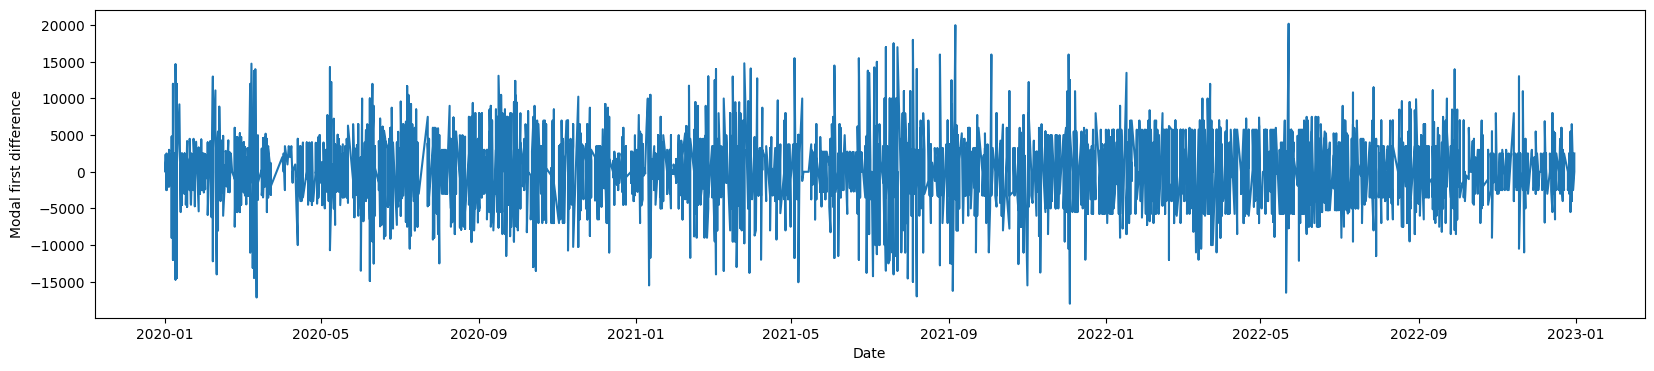

In [24]:
plt.figure(figsize=(20,4))
plt.plot(df_newvariety['Date'],df_newvariety['Modal First difference'])
plt.xlabel('Date')
plt.ylabel('Modal first difference')
plt.show()

In [77]:
df_test_newvariety = df_newvariety.reset_index()['Modal First difference'].dropna()
#plt.plot(df_test_newvariety)

In [26]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df_test_newvariety = scaler.fit_transform(np.array(df_test_newvariety).reshape(-1,1))
print(df_test_newvariety)

[[0.53010471]
 [0.47120419]
 [0.53664921]
 ...
 [0.47120419]
 [0.47120419]
 [0.53664921]]


#### Preparing train and test data for pepper new_variety

In [27]:
train_size = int(len(df_test_newvariety)*0.8)
test_size = len(df_test_newvariety) - train_size
train_data, test_data = df_test_newvariety[:train_size], df_test_newvariety[train_size:(train_size+test_size)]

In [28]:
train_data.shape, test_data.shape

((2136, 1), (535, 1))

In [59]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [60]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [61]:
print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

X_train:  (2035, 100)
X_test:  (434, 100)
y_train:  (2035,)
y_test:  (434,)


In [70]:
print(X_train)

[[0.53010471 0.47120419 0.53664921 ... 0.48429319 0.40575916 0.52356021]
 [0.47120419 0.53664921 0.40575916 ... 0.40575916 0.52356021 0.53664921]
 [0.53664921 0.40575916 0.41884817 ... 0.52356021 0.53664921 0.41884817]
 ...
 [0.43848168 0.65445026 0.20942408 ... 0.62172775 0.32068063 0.62172775]
 [0.65445026 0.20942408 0.58246073 ... 0.32068063 0.62172775 0.36649215]
 [0.20942408 0.58246073 0.47120419 ... 0.62172775 0.36649215 0.42539267]]


In [32]:
print(y_train)

[0.53664921 0.41884817 0.53141361 ... 0.36649215 0.42539267 0.62172775]


In [50]:
# reshape input to be [sample, time_steps, features] which is required for LSTM

X_train= X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test= X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(units=50, return_sequences = True,input_shape=(100,1)),
    LSTM(units=50, return_sequences = True),
    LSTM(units=50),
    Dense(units=1)
])  

model.compile(loss='mean_squared_error',optimizer='adam')


In [74]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_pepper_newvariety = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=30, batch_size=64,shuffle=True,verbose=2)

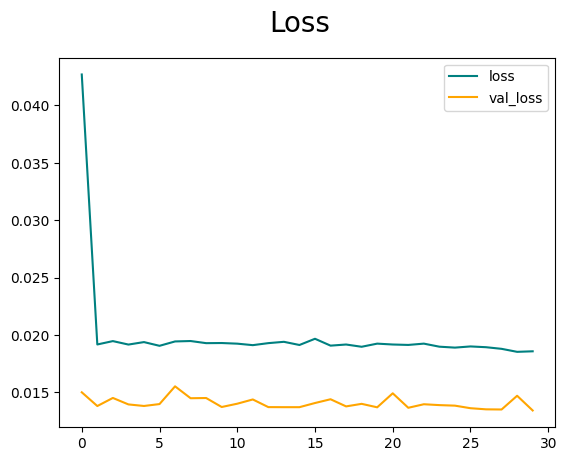

In [76]:
fig = plt.figure()
plt.plot(model_pepper_newvariety.history['loss'],color = 'teal',label = 'loss')
plt.plot(model_pepper_newvariety.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper right')
plt.show()

In [62]:
model2 = Sequential([
    LSTM(units=64, return_sequences=True, input_shape=(100,1)),
    Dense(units=50),
    Dense(units=1)
])

model2.compile(optimizer='adam',loss='mean_squared_error',metrics=['mse'])


In [63]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 100, 64)           16896     
                                                                 
 dense_4 (Dense)             (None, 100, 50)           3250      
                                                                 
 dense_5 (Dense)             (None, 100, 1)            51        
                                                                 
Total params: 20,197
Trainable params: 20,197
Non-trainable params: 0
_________________________________________________________________


In [64]:
model2_pepper_new_variety = model2.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=30, batch_size=32, shuffle=True,verbose=2)

Epoch 1/30


64/64 - 6s - loss: 0.0367 - mse: 0.0367 - val_loss: 0.0153 - val_mse: 0.0153 - 6s/epoch - 100ms/step
Epoch 2/30
64/64 - 3s - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0149 - val_mse: 0.0149 - 3s/epoch - 51ms/step
Epoch 3/30
64/64 - 3s - loss: 0.0201 - mse: 0.0201 - val_loss: 0.0148 - val_mse: 0.0148 - 3s/epoch - 51ms/step
Epoch 4/30
64/64 - 4s - loss: 0.0201 - mse: 0.0201 - val_loss: 0.0146 - val_mse: 0.0146 - 4s/epoch - 59ms/step
Epoch 5/30
64/64 - 3s - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0148 - val_mse: 0.0148 - 3s/epoch - 49ms/step
Epoch 6/30
64/64 - 3s - loss: 0.0200 - mse: 0.0200 - val_loss: 0.0144 - val_mse: 0.0144 - 3s/epoch - 48ms/step
Epoch 7/30
64/64 - 3s - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0141 - val_mse: 0.0141 - 3s/epoch - 48ms/step
Epoch 8/30
64/64 - 3s - loss: 0.0194 - mse: 0.0194 - val_loss: 0.0140 - val_mse: 0.0140 - 3s/epoch - 49ms/step
Epoch 9/30
64/64 - 4s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0139 - val_mse: 0.0139 - 4s/epoch - 57ms/step
Epoch 10/30

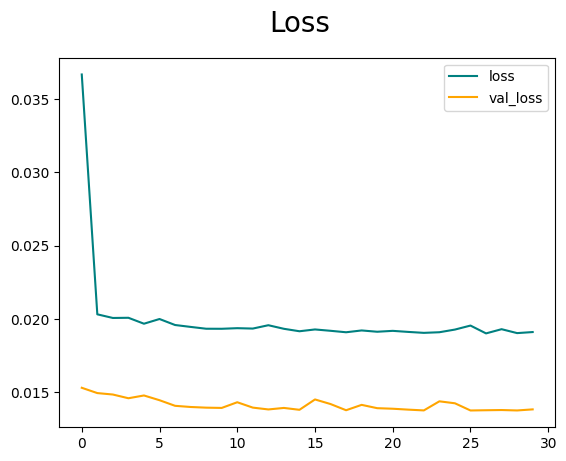

In [66]:
fig = plt.figure()
plt.plot(model2_pepper_new_variety.history['loss'],color = 'teal',label = 'loss')
plt.plot(model2_pepper_new_variety.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper right')
plt.show()

In [144]:
train_predict = model2.predict(X_train,verbose=0)
test_predict = model2.predict(X_test,verbose=0)


In [145]:
print(train_predict.shape, test_predict.shape)

(2035, 100, 1) (434, 100, 1)


In [150]:
train_predict_2d = train_predict.reshape(train_predict.shape[0],train_predict.shape[1])
test_predict_2d = test_predict.reshape(test_predict.shape[0],test_predict.shape[1])
print(train_predict_2d.shape,test_predict_2d.shape)

(2035, 100) (434, 100)


In [159]:
##### transform to original form

train_predict = scaler.inverse_transform(train_predict_2d)
test_predict = scaler.inverse_transform(test_predict_2d)

print(train_predict.shape, test_predict.shape)

(2035, 100) (434, 100)
[[360.88495 368.72656 371.44064 ... 374.65332 375.54132 374.34824]
 [360.9487  368.24615 372.6155  ... 375.54132 374.34824 374.22983]
 [360.87128 369.0863  372.45157 ... 374.34824 374.22983 375.3933 ]
 ...
 [360.95325 367.24203 373.5445  ... 373.187   376.17657 372.95477]
 [360.5138  369.5599  370.81448 ... 376.17657 372.95477 375.8419 ]
 [360.129   367.73157 372.31952 ... 372.95477 375.8419  375.24988]]


#### Check the mse

In [162]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(X_train,train_predict))

373.9860975289589

In [163]:
math.sqrt(mean_squared_error(X_test,test_predict))

374.032389083534

#### Prediciting future dates

#### Random testing data

In [107]:
selected_columns = ['Date','Modal First difference']
df_test1 = df_newvariety[selected_columns].dropna()
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2671 entries, 4730 to 172
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    2671 non-null   datetime64[ns]
 1   Modal First difference  2671 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 62.6 KB


In [109]:
#from statsmodels.tsa.seasonal import seasonal_decompose

In [114]:
train = df_test1['Modal First difference'].iloc[:2571]
test = df_test1['Modal First difference'].iloc[2571:]

train = train.values.reshape(-1,1)
test = test.values.reshape(-1,1)

In [115]:
scaler_new = MinMaxScaler()
scaler_new.fit(train)
scaled_train = scaler_new.transform(train)
scaled_test = scaler_new.transform(test)

In [116]:
scaled_train[:10]

array([[0.53010471],
       [0.47120419],
       [0.53664921],
       [0.40575916],
       [0.41884817],
       [0.52356021],
       [0.5104712 ],
       [0.43193717],
       [0.41884817],
       [0.44502618]])

In [118]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [136]:
n_input = 500
n_features = 1
generator = TimeseriesGenerator(scaled_train,scaled_train, length=n_input, batch_size=1)

In [ ]:
X, y = generator[1]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n{y}')

In [138]:
X.shape

(1, 500, 1)

In [ ]:
model2_test = model2.fit(generator,epochs=20,verbose=2)